# **Pruebas Estadísticas**

[Victor Sanchez](https://github.com/VicoSan07) <br>
Dataset: [Wine Quality](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

### **Objetivo**

Realizar pruebas estadísticas con el fin de analizar el comportamiento de los modelos de regresión

### **Carga de Dataset**

In [89]:
import pandas as pd

#Carga de dataset 'vino rojo' 
dfwiner = pd.read_csv(r'C:/Users/vicos/Documents/winequality-red.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

#Carga de dataset 'vino blanco' 
dfwinew = pd.read_csv(r'C:/Users/vicos/Documents/winequality-white.csv',delimiter=";",
                      #Tipo de datos en cada columna
                      dtype={
                          'fixed acidity': float,
                          'volatile acidity': float,
                          'citric acid': float,
                          'residual sugar': float,
                          'chlorides': float,
                          'free sulfur dioxide': float,
                          'total sulfur dioxide': float,
                          'density': float,
                          'pH': float,
                          'sulphates': float,
                          'alcohol': float,
                          'quality': int,
                      })

# Crear columnas con string constante en cada fila
dfwiner['type']='red'
dfwinew['type']='white'

dfwineall = pd.concat([dfwiner,dfwinew],ignore_index=True)
dfwineall = dfwineall.drop(columns=["type"])

# Renombramos los nombres de las variables para facilitar su representación visual
dfwineall.rename(
    columns={"fixed acidity": "FA",
            "volatile acidity": "VA",
             "citric acid": "CA",
             "residual sugar": "RS",
             "chlorides": "CH",
             "free sulfur dioxide": "FSD",
             "total sulfur dioxide": "TSD",
             "density": "DE",
             "pH": "PH",
             "sulphates": "SU",
             "alcohol": "AL",
             "quality": "QU"},
    inplace=True,
)

dfwineall

,FA,VA,CA,RS,CH,FSD,TSD,DE,PH,SU,AL,QU
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


A partir de aquí vamos a partir los datos en 2 conjuntos: variables independientes y variable dependiente. Posteriormente partiremos estos dos conjuntos en _train_ y _test_ para evaluar el desempeño del modelo.

In [90]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X=dfwineall.iloc[:,:-1]
Y=dfwineall.iloc[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X.values,Y.values,test_size=0.2,random_state=0)

### **Regresión Lineal Múltiple**

Aplicamos la regresión lineal

In [91]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(X_train,Y_train)
Y_prediction=regressor.predict(X_test)

### **Random Forest Regressor**


In [92]:
# Aplicación Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
RFC = RandomForestRegressor(n_estimators=100)
RFC.fit(X_train,Y_train)

Y3_prediction = RFC.predict(X_test)

### **Diseño de Experimentos**

In [95]:
# Factor 1: Modelos, 2 niveles
# Respuesta: Calidad vino
MLR_df = pd.DataFrame(abs(Y_test-Y_prediction))
MLR_df['Modelo']='MLR'

RFR_df = pd.DataFrame(abs(Y_test-Y3_prediction))
RFR_df['Modelo']='RFR'

DOE_df = pd.concat([MLR_df,RFR_df])
DOE_df.rename(columns={0: 'Error', 'Modelo': 'Modelo'},inplace=True)

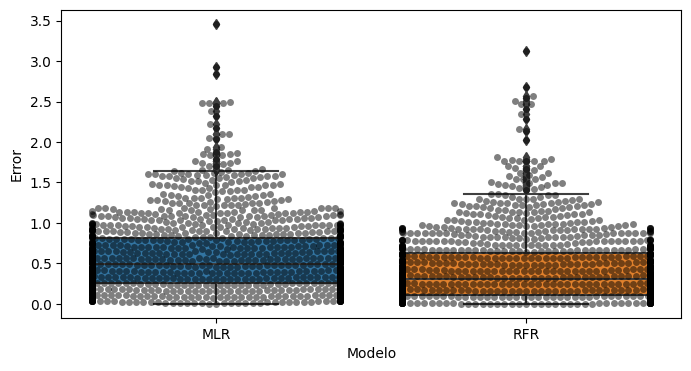

In [104]:
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="Modelo", y="Error", data=DOE_df, ax=ax)
sns.swarmplot(x="Modelo", y="Error", data=DOE_df, color='black', alpha = 0.5, ax=ax);

Notemos que en ambos grupos, los datos no siguen una distribución normal

In [99]:
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

pg.normality(data=DOE_df, dv='Error', group='Modelo')

,W,pval,normal
Modelo,,,
MLR,0.890981,2.397341e-29,False
RFR,0.831375,6.008541e-35,False


Además, no son independientes

In [101]:
from scipy.stats.stats import pearsonr

pearsonr(abs(Y_test-Y_prediction), abs(Y_test-Y3_prediction))

PearsonRResult(statistic=0.6660276194281767, pvalue=1.9107461046179292e-167)

Se aplica la prueba de los rangos con signo de Wilcoxon para analizar si la mediana de las diferencias de cada par de datos es cero, es decir, provienen de la misma distribución o no.

In [103]:
import scipy.stats as stats
 
stats.wilcoxon(abs(Y_test-Y_prediction), abs(Y_test-Y3_prediction),alternative='two-sided')

WilcoxonResult(statistic=227261.0, pvalue=2.700137305380999e-47)

No existe evidencia estadística de que los modelos sigan distintas distribuciones, los errores son más altos mediante la regresión lineal múltiple.

### **Conclusiones**

Con las pruebas realizadas finalmente se confirma estadísticamente el mejor desempeño obtenido por la regresión realizada a tráves de bosque aleatorio.